In [570]:
import numpy as np
import pandas as pd

In [571]:
df_sms = pd.read_csv(filepath_or_buffer=".\\dataset\\spam.csv", encoding="ISO-8859-1")

In [572]:
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [573]:
df_sms.shape

(5572, 5)

In [574]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [575]:
df_sms.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [576]:
df_sms.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [577]:
df_sms.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [578]:
df_sms.sample(5)

,v1,v2
3871,ham,I am joining today formally.Pls keep praying.w...
2894,ham,Went to ganesh dress shop
1165,ham,"Haha yeah I see that now, be there in a sec"
2039,ham,Dont pack what you can buy at any store.like c...
4275,ham,Can you please send me my aunty's number


In [579]:
df_sms['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [580]:
df_sms = df_sms.rename(columns={"v1":"type", "v2":"sms"})

In [581]:
df_sms.sample()

,type,sms
2361,ham,Hi. I'm sorry i missed your call. Can you pls ...


In [582]:
df_sms.duplicated().sum()

403

In [583]:
df_sms.drop_duplicates(inplace=True)

In [584]:
df_sms.duplicated().sum()

0

In [585]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [586]:
spam_or_not = df_sms['type'].value_counts()
spam_or_not

type
ham     4516
spam     653
Name: count, dtype: int64

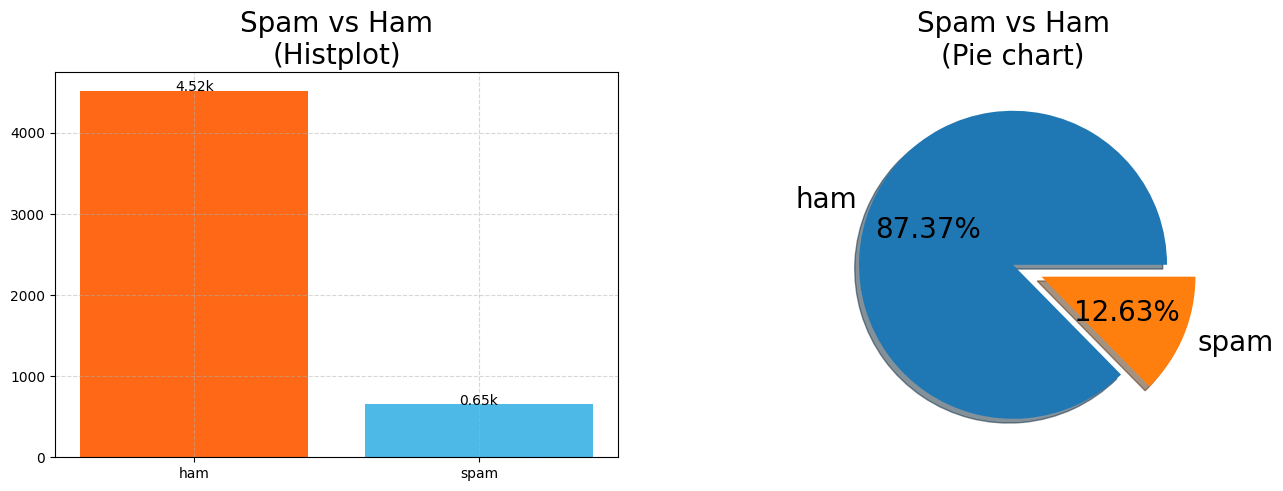

In [587]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
plt.bar(spam_or_not.index, spam_or_not.values, color = ["#FE6816","#4CB9E7"])
for i, value in enumerate(spam_or_not.values):
    plt.text(i, value, f"{round(value/1000, 2)}k", ha='center')
plt.grid( True, linestyle='--', alpha=0.5, zorder=0)
plt.title(label="Spam vs Ham\n(Histplot)", fontdict={"size" : "20"})

plt.subplot(1,2,2)
plt.pie(x=spam_or_not,explode=[0,0.2], shadow=True, labels=spam_or_not.index,textprops={'fontsize':20},autopct = "%.2f%%")
plt.title(label="Spam vs Ham\n(Pie chart)", fontdict={"size" : "20"})
plt.show()

In [588]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [589]:
# creating three more columns 
# 1. number of characters
# 2. number of words.
# 3. number of sentences.

In [590]:
df_sms['number_of_chars'] = df_sms['sms'].apply(lambda x: len(x))

In [591]:
df_sms['number_of_words'] = df_sms['sms'].apply(lambda x: len(nltk.word_tokenize(x)))

In [592]:
df_sms['number_of_sentences'] = df_sms['sms'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [593]:
df_sms.sample()

,type,sms,number_of_chars,number_of_words,number_of_sentences
972,ham,Yup i thk so until e shop closes lor.,37,10,1


In [594]:
spam_v_ham = df_sms.groupby(by='type')
ham = spam_v_ham.get_group(name='ham')
spam = spam_v_ham.get_group(name='spam')

In [595]:
ham.describe()

,number_of_chars,number_of_words,number_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [596]:
spam.describe()

,number_of_chars,number_of_words,number_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [597]:
x = pd.concat([ ham.describe().loc['mean'], spam.describe().loc['mean']], axis=1)
x.columns = ['ham', 'spam']
x = x.T
x

,number_of_chars,number_of_words,number_of_sentences
ham,70.459256,17.123782,1.820195
spam,137.891271,27.667688,2.970904


In [598]:
y = pd.concat([ ham.describe().loc['min'], spam.describe().loc['min']], axis=1)
y.columns = ['ham', 'spam']
y.astype({'ham' : 'int64', 'spam': 'int64'}).T

,number_of_chars,number_of_words,number_of_sentences
ham,2,1,1
spam,13,2,1


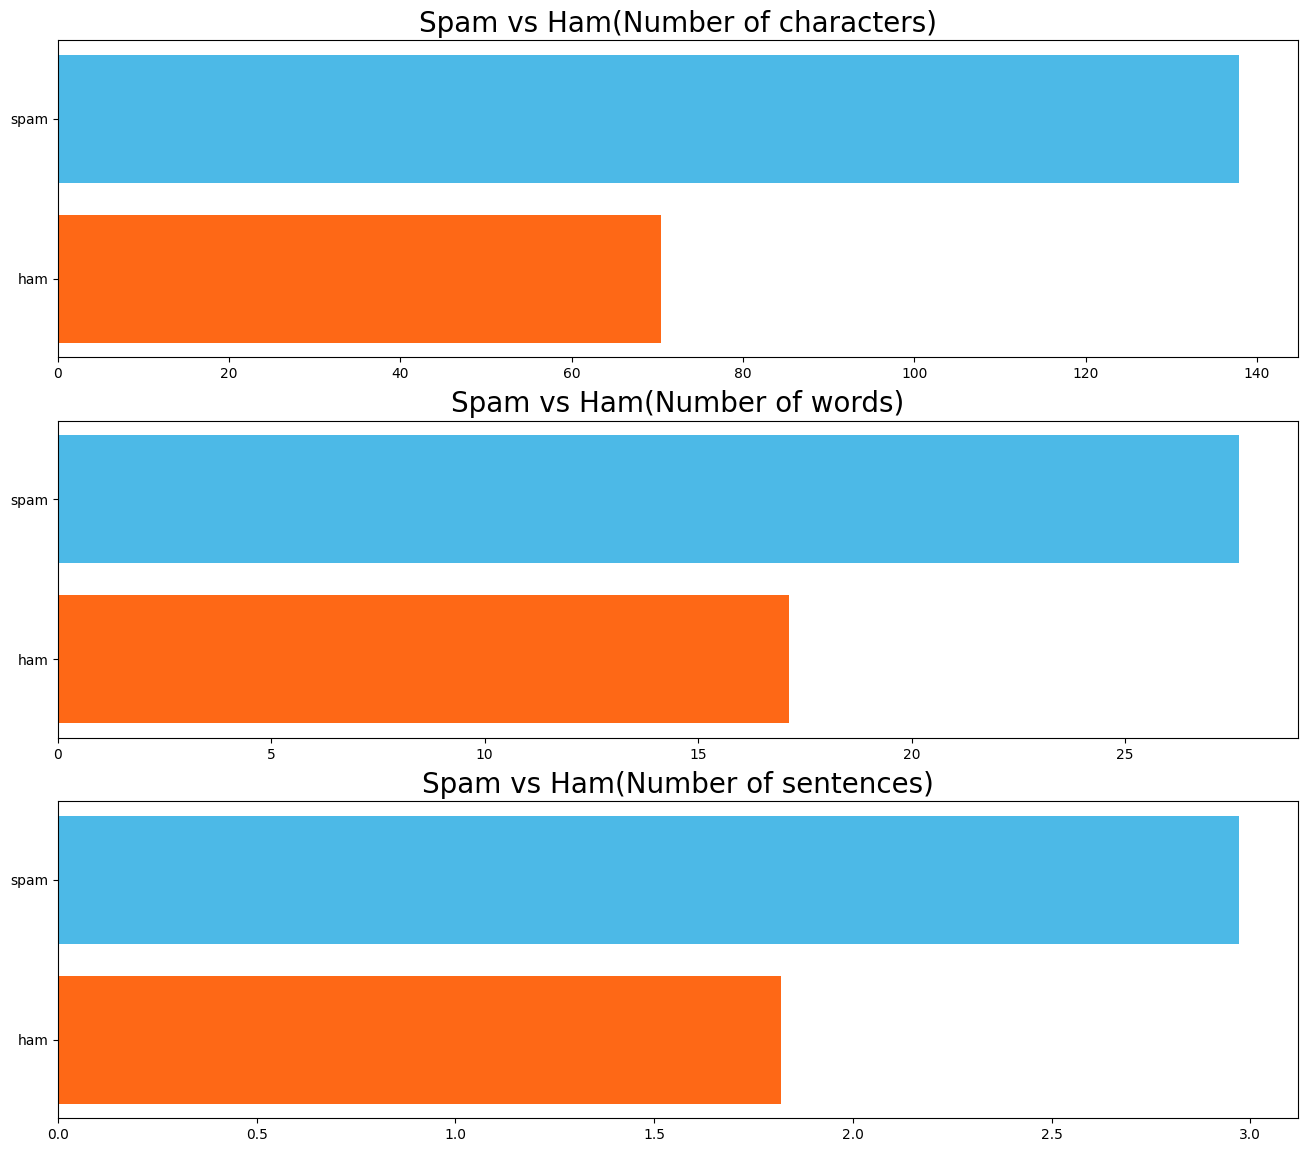

In [599]:
plt.figure(figsize=[16,14])
plt.subplot(3,1,1)
plt.barh(y=x.index, width=x['number_of_chars'], color = ["#FE6816","#4CB9E7"])
plt.title(label="Spam vs Ham(Number of characters)", fontdict={"size" : "20"})
plt.subplot(3,1,2)
plt.barh(y=x.index, width=x['number_of_words'], color = ["#FE6816","#4CB9E7"])
plt.title(label="Spam vs Ham(Number of words)", fontdict={"size" : "20"})
plt.subplot(3,1,3)
plt.barh(y=x.index, width=x['number_of_sentences'], color = ["#FE6816","#4CB9E7"])
plt.title(label="Spam vs Ham(Number of sentences)", fontdict={"size" : "20"})
plt.show()

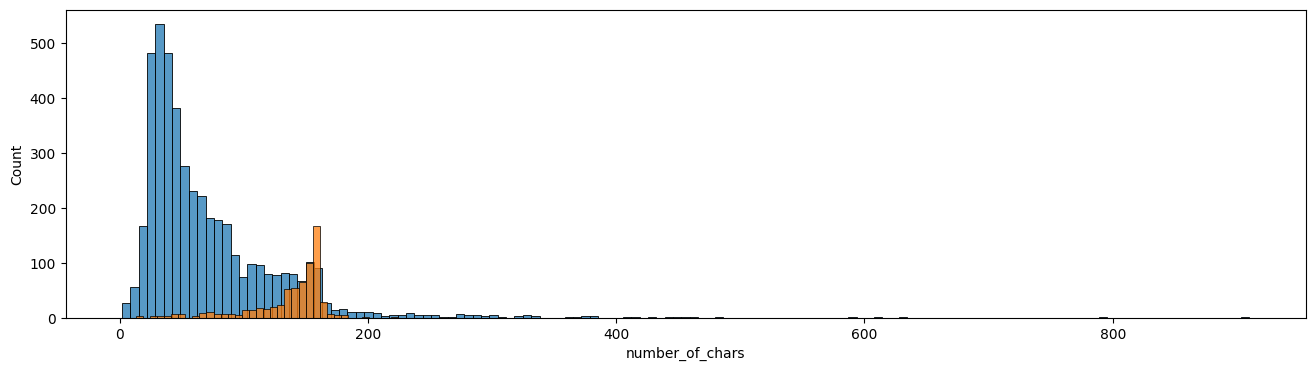

In [600]:
plt.figure(figsize=[16,4])
sns.histplot(df_sms[df_sms['type']=='ham']['number_of_chars'])
sns.histplot(df_sms[df_sms['type']=='spam']['number_of_chars'])
plt.show()

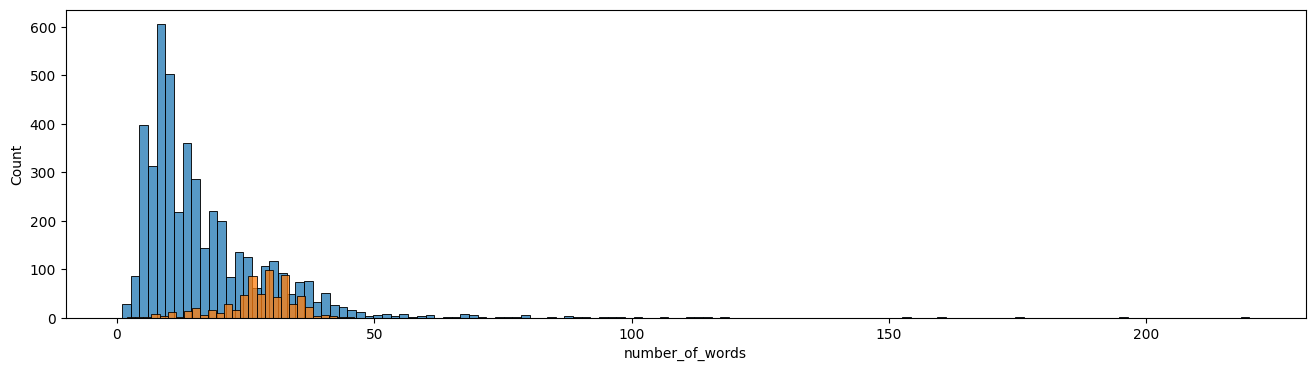

In [601]:
plt.figure(figsize=[16,4])
sns.histplot(df_sms[df_sms['type']=='ham']['number_of_words'])
sns.histplot(df_sms[df_sms['type']=='spam']['number_of_words'])
plt.show()

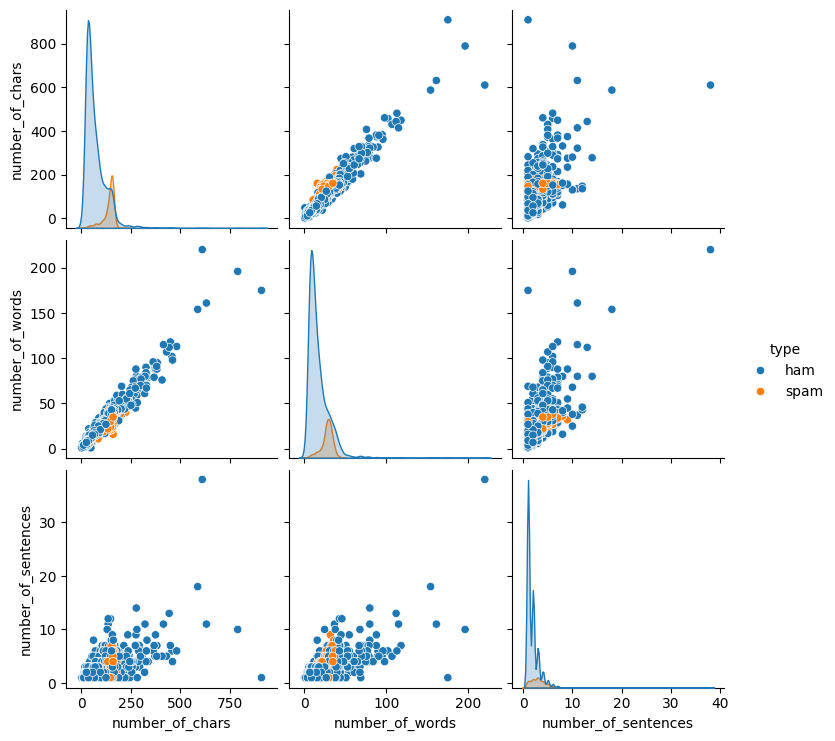

In [602]:
sns.pairplot(data=df_sms, hue='type')
plt.show()

In [603]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 5169 non-null   object
 1   sms                  5169 non-null   object
 2   number_of_chars      5169 non-null   int64 
 3   number_of_words      5169 non-null   int64 
 4   number_of_sentences  5169 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 242.3+ KB


In [604]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_sms['type'] = encoder.fit_transform(df_sms['type'])

In [605]:
continuous_data = df_sms.select_dtypes(include=['int']).columns
continuous_data

Index(['type', 'number_of_chars', 'number_of_words', 'number_of_sentences'], dtype='object')

In [608]:
df_sms

,type,sms,number_of_chars,number_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


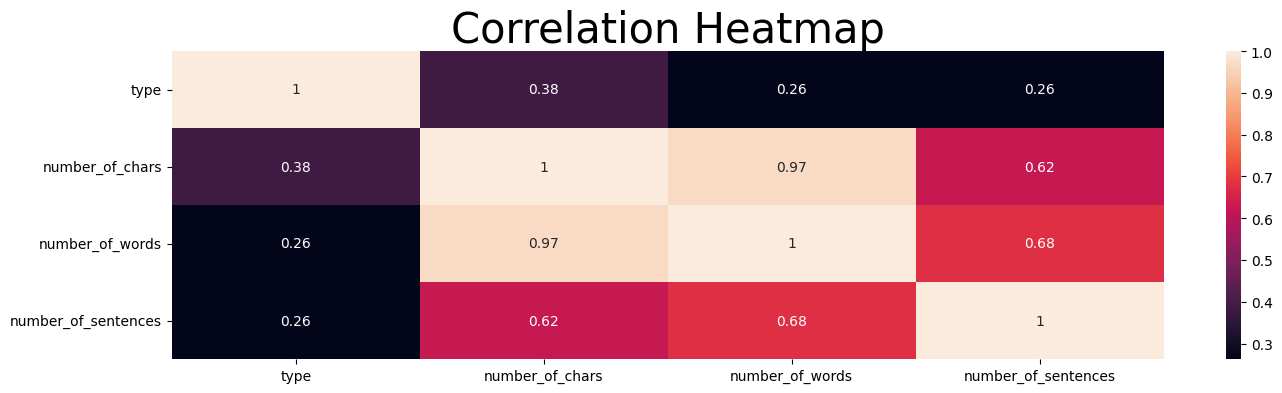

In [609]:
# correlation matrix
corr_matrix = df_sms[continuous_data].corr()

# Create a heatmap using seaborn
plt.figure(figsize=[16,4])
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap', fontdict={'fontsize' : 30})
plt.show()